## Data Preprocessing

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'


import scipy.stats as stats
from scipy.special import inv_boxcox

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("D:\Data\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop(['Id'], axis=1, inplace=True)

## Data Cleaning

In [6]:
# Indenfiying the Duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.isna()
df.isna().value_counts()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
False          False         False          False         False      150
dtype: int64

In [11]:
df.duplicated()
df.duplicated().value_counts()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

False    147
True       3
dtype: int64

In [12]:
df[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [13]:
df.drop_duplicates(keep='first', inplace=True)

In [14]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


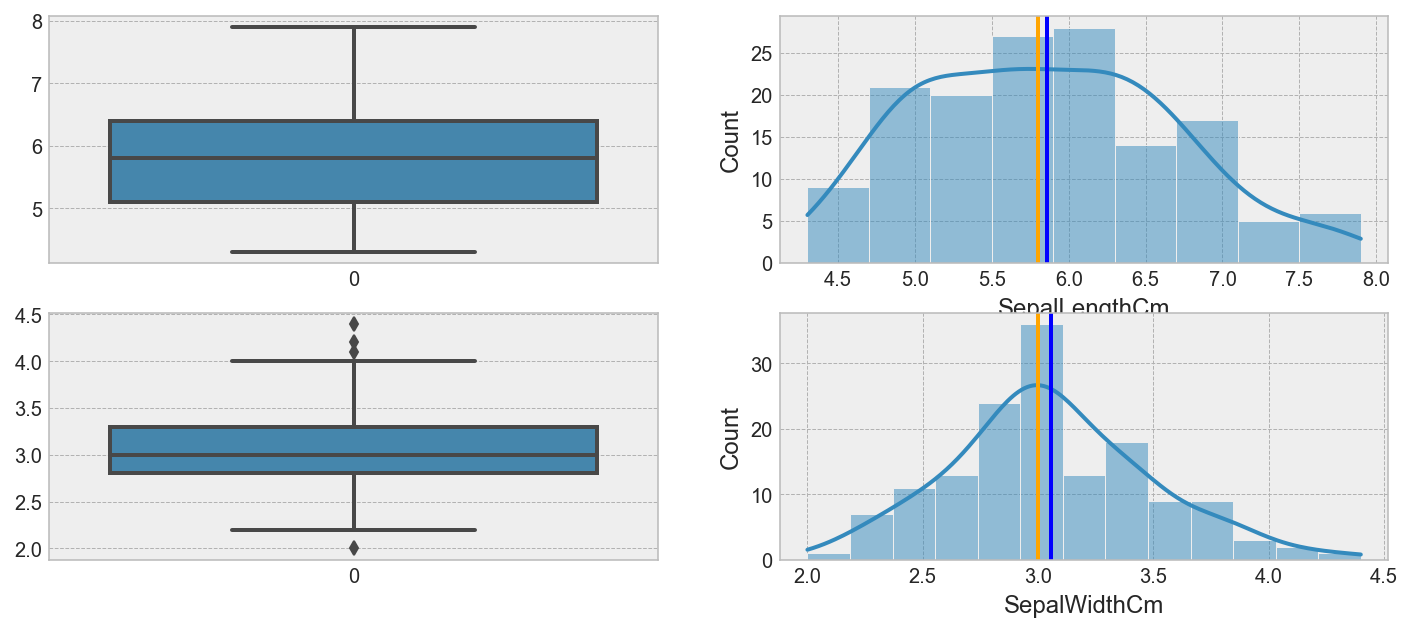

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(221)
sns.boxplot(df.SepalLengthCm)
plt.subplot(222)
sns.histplot(df.SepalLengthCm,kde=True)
plt.axvline(df.SepalLengthCm.mean(),color = 'blue')
plt.axvline(df.SepalLengthCm.median(),color = 'orange')
plt.subplot(223)
sns.boxplot(df.SepalWidthCm)
plt.subplot(224)
sns.histplot(df.SepalWidthCm,kde=True)
plt.axvline(df.SepalWidthCm.mean(),color = 'blue')
plt.axvline(df.SepalWidthCm.median(),color = 'orange');

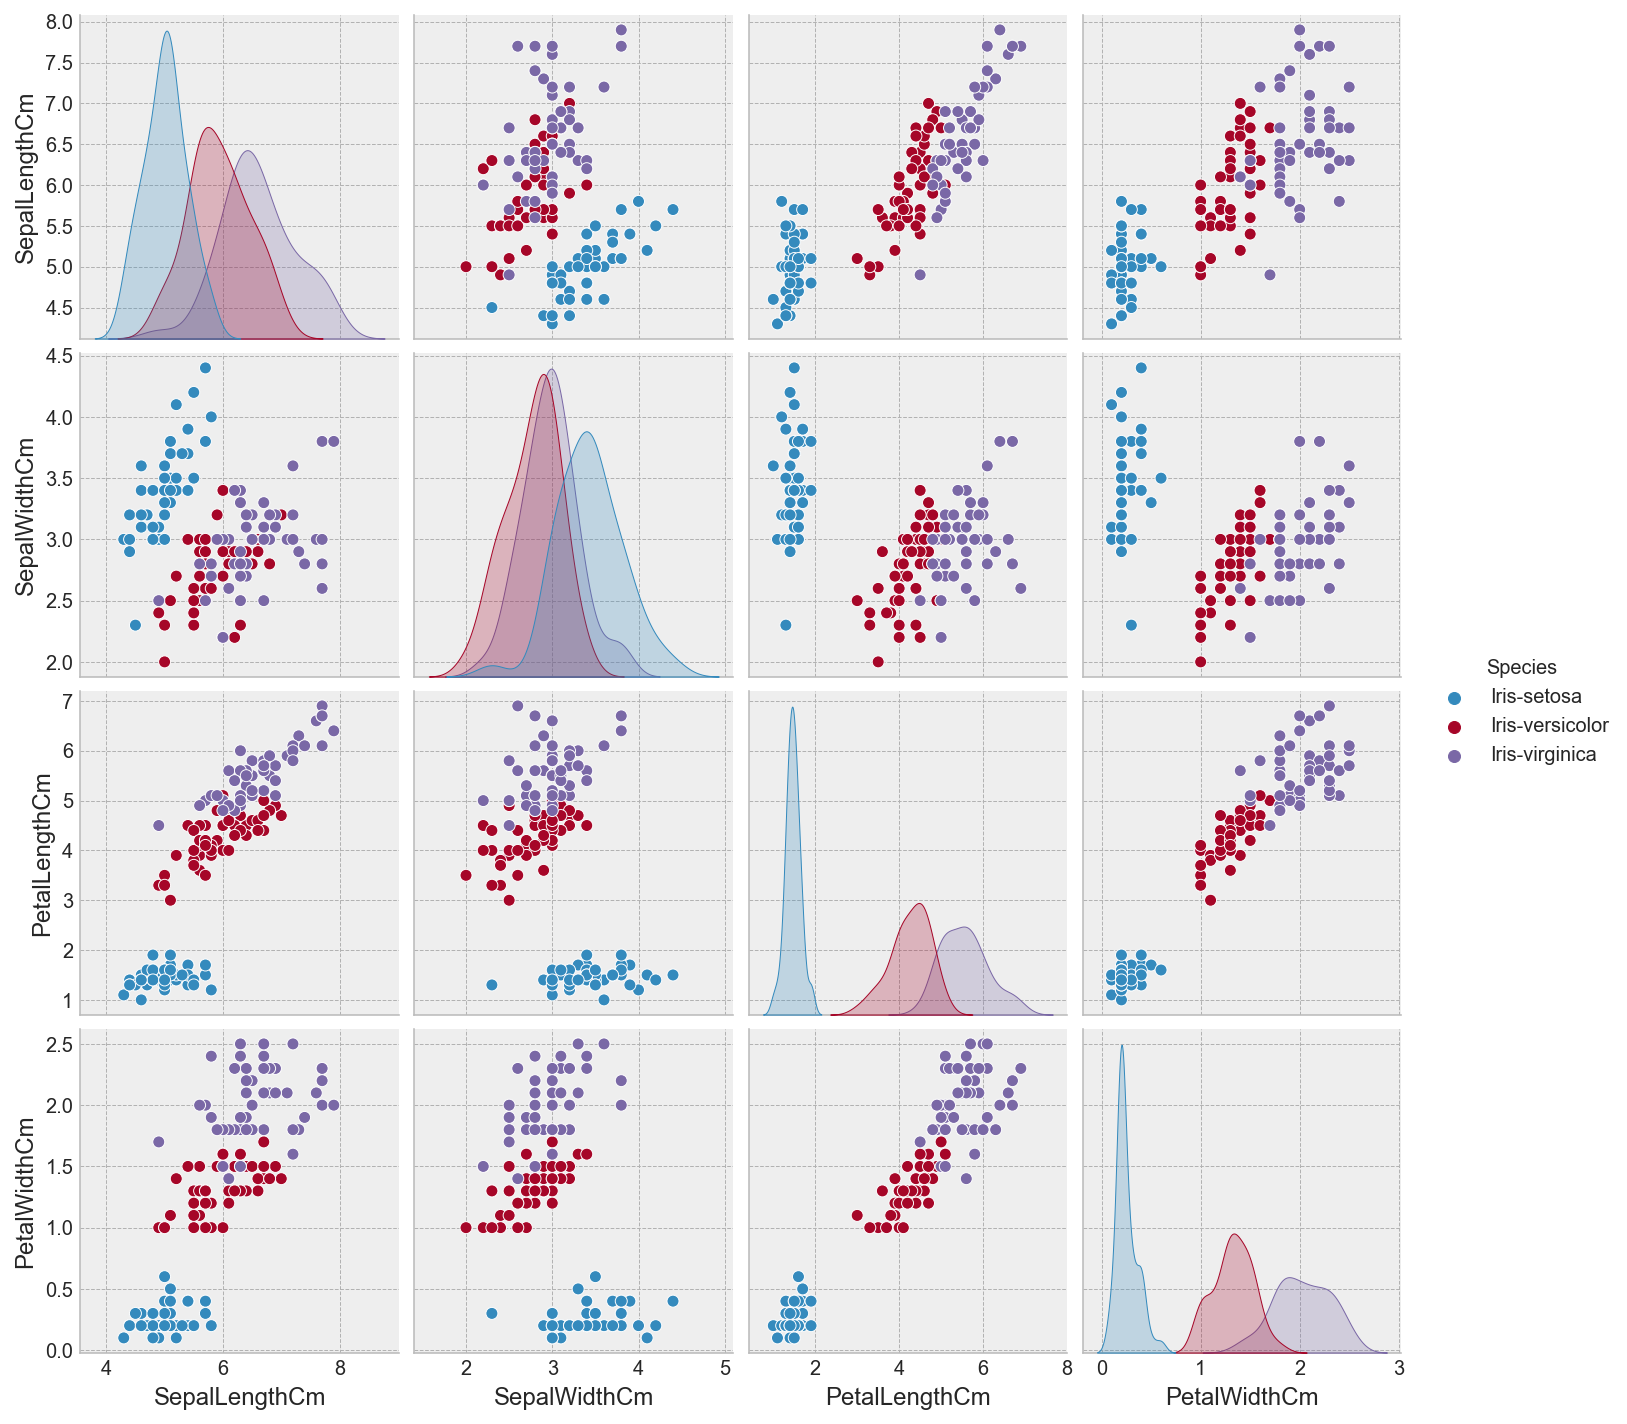

In [21]:
sns.pairplot(df, hue='Species');

## Observation

It looks like I don't have to consider all 4 variables to build my model. I can consider either one of the following pair:

1. PetalLength and SepalLength
2. PetalLength and SepalWidth
3. PetalLength and PetalWidth
4. PetalWidth and SepalLength

## Data Preparation and Modelling

Have a look at the steps that are followed:

1. Load the data
2. Analyse the data
3. Data Preparation
4. Training
5. Predictions
6. Evaluation


## Data Preparation

1. Identifying the inputs (X) and output (y)
2. Split into train and test
3. Preprocess the training data
4. Preprocess the test data

In [22]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [23]:
y.head()
X.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
# Data-preprocessing: Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(110, 4) (110,)
(37, 4) (37,)


In [25]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
print(X_train_transformed.shape)

(110, 4)


In [26]:
X_test_transformed = scaler.transform(X_test)
print(X_test_transformed.shape)

(37, 4)


## Training

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

## Prediction

In [28]:
y_test_pred = classifier.predict(X_test_transformed)

## Evaluation

In [29]:
# calculate accuracy of class predictions
from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)

0.972972972972973

## Training - KNN Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

KNeighborsClassifier()

0.9459459459459459

## Training - DT Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

DecisionTreeClassifier()

0.972972972972973

## Training - Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

RandomForestClassifier()

0.972972972972973

## Conclusion
- `Logistic Regression,Decision Tree Classifier, Random forest classifier` are given `97.29%`
- `Logistic Regression,Decision Tree Classifier, Random forest classifier` has given more `accurate score` compared to the other algorithms.
- so we can use this model to predict Spieces of the flower by using it's Sepallengthcm, Sepalwidthcm , Petallengthcm, Petal widthcm and above all the models will work as accurately.

_____